# Lab 09: Train with mini-batches -- exercise

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from random import randint
import utils

### Download the data and print the sizes

In [2]:
train_data=torch.load('../data/fashion-mnist/train_data.pt')

print(train_data.size())

torch.Size([60000, 28, 28])


In [3]:
train_label=torch.load('../data/fashion-mnist/train_label.pt')

print(train_label.size())

torch.Size([60000])


In [4]:
test_data=torch.load('../data/fashion-mnist/test_data.pt')

print(test_data.size())

torch.Size([10000, 28, 28])


### Make a one layer net class 

In [8]:
class one_layer_net(nn.Module):

    def __init__(self, input_size, output_size):
        super(one_layer_net , self).__init__()
        self.linear_layer = nn.Linear(input_size,output_size,bias=True)
        
    def forward(self, x):
        y = self.linear_layer(x)
        prob = F.softmax(y)
        return prob

### Build the net

In [9]:
net=one_layer_net(784,10)
print(net)

one_layer_net(
  (linear_layer): Linear(in_features=784, out_features=10, bias=True)
)


### Choose the size of the mini-batches 

In [10]:
bs= 200

### Train the network (only 5000 iterations) on the train set

In [12]:
criterion = nn.NLLLoss()
optimizer=torch.optim.SGD(net.parameters() , lr=0.01 )

for iter in range(1,5000):
    
    # create a minibatch
    indices= torch.LongTensor(bs).random_(0,59999+1)
    minibatch_data = train_data[indices]
    minibatch_label=  train_label[indices]
    
    #reshape them to fit the network
    inputs= minibatch_data.view(bs,784)

    # feed the input to the net  
    inputs.requires_grad_()
    prob= net(inputs)
    
    
    # update the weights (all the magic happens here -- we will discuss it later)
    log_prob=torch.log(prob)
    loss = criterion(log_prob, minibatch_label)    
    optimizer.zero_grad()       
    loss.backward()
    optimizer.step()

C:\Users\shuoyan001\AppData\Local\Continuum\miniconda3\envs\deeplearn_course\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  if __name__ == '__main__':


### Choose image at random from the test set and see how good/bad are the predictions

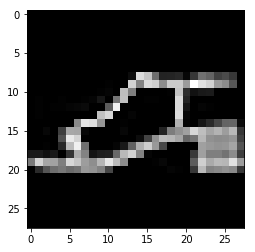

C:\Users\shuoyan001\AppData\Local\Continuum\miniconda3\envs\deeplearn_course\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  if __name__ == '__main__':


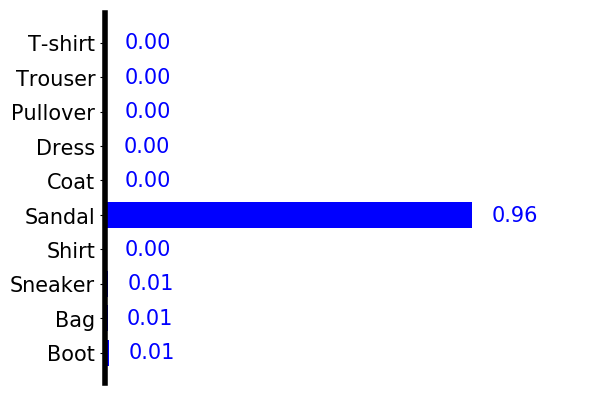

In [13]:
# choose a picture at random
idx=randint(0, 10000-1)
im=test_data[idx]

# diplay the picture
utils.show(im)

# feed it to the net and display the confidence scores
prob =  net( im.view(1,784)) 
utils.show_prob_fashion_mnist(prob)